<a href="https://colab.research.google.com/github/22224516GurungYash/Group-13-Project-2/blob/main/Group_13_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 7: Image Captioning using Hugging Face Vision Models

Description: Generate captions for images using Hugging Face’s Blip model, combining NLP and computer vision

In [ ]:
pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#Inserted data from HuggingFace
link to the dataset: https://huggingface.co/datasets/Naveengo/flickr8k

In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

ds = load_dataset("Naveengo/flickr8k", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/539 [00:00<?, ?B/s]

(…)-00000-of-00003-942e07a3ce94e325.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

(…)-00001-of-00003-5f4071f26210e241.parquet:   0%|          | 0.00/363M [00:00<?, ?B/s]

(…)-00002-of-00003-c7bf5ccc354b5dd7.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8091 [00:00<?, ? examples/s]

In [ ]:
ds[:5]


{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A black dog and a spotted dog are fighting',
  'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A man lays on a bench while his dog sits by him .',
  'A man in an orange hat starring at something .']}

#Loading the pre-trained BLIP image captioning model.

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

#Pre-Process the Text

In [ ]:
# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the dataset (if needed)
dataset = ds.map(lambda x: {'text': preprocess_text(x['text'])})
dataset[:5]

Map:   0%|          | 0/8091 [00:00<?, ? examples/s]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['a child in a pink dress is climbing up a set of stairs in an entry way .',
  'a black dog and a spotted dog are fighting',
  'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'a man lays on a bench while his dog sits by him .',
  'a man in an orange hat starring at something .']}

In [ ]:
import re

def remove_special_characters_and_numbers(text):
    # Remove special characters and numbers, keeping only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the function to the dataset
dataset = dataset.map(lambda x: {'text': remove_special_characters_and_numbers(x['text'])})
dataset[:5]

Map:   0%|          | 0/8091 [00:00<?, ? examples/s]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['a child in a pink dress is climbing up a set of stairs in an entry way ',
  'a black dog and a spotted dog are fighting',
  'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl ',
  'a man lays on a bench while his dog sits by him ',
  'a man in an orange hat starring at something ']}

In [ ]:
dataset[:5]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['a child in a pink dress is climbing up a set of stairs in an entry way ',
  'a black dog and a spotted dog are fighting',
  'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl ',
  'a man lays on a bench while his dog sits by him ',
  'a man in an orange hat starring at something ']}

#Performing BLIP image captioning model.

In [ ]:
sample_ds = dataset[0:1500]
sample_ds

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x429>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x357>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x487>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB s

In [ ]:
results = pipe(sample_ds['image'])
results

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[[{'generated_text': 'there is a little girl standing on the steps of a house'}],
 [{'generated_text': 'there are two dogs playing on the road with each other'}],
 [{'generated_text': 'there is a little girl sitting on the grass with a painting on the ground'}],
 [{'generated_text': 'there is a man laying on a bench with a dog next to him'}],
 [{'generated_text': 'there is a man wearing a hat made of beer cans'}],
 [{'generated_text': 'there is a small child climbing on a rope net'}],
 [{'generated_text': 'there is a dog running in the grass with a frisbee in its mouth'}],
 [{'generated_text': 'puppy playing with a ball on the beach near the water'}],
 [{'generated_text': 'there is a young boy riding a skateboard down the street'}],
 [{'generated_text': 'there is a dog that is jumping over a log'}],
 [{'generated_text': 'there is a dog that is running in the snow with a frisbee'}],
 [{'generated_text': 'skiers in the snow with a man standing behind them'}],
 [{'generated_text': 'there 

In [ ]:
true_labels = sample_ds['text']  # Actual labels (captions)

# Predicted labels
predicted_labels = [result[0]['generated_text'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label Captions': predicted_labels,
})
comparison_df

,True Label,Predicted Label Captions
0,a child in a pink dress is climbing up a set o...,there is a little girl standing on the steps o...
1,a black dog and a spotted dog are fighting,there are two dogs playing on the road with ea...
2,a little girl covered in paint sits in front o...,there is a little girl sitting on the grass wi...
3,a man lays on a bench while his dog sits by him,there is a man laying on a bench with a dog ne...
4,a man in an orange hat starring at something,there is a man wearing a hat made of beer cans
...,...,...
1495,a boy in a blue shirt jumps down stairs on a s...,skateboarder doing a trick on a set of stairs ...
1496,a man in a black cap and shirt smiling while h...,smiling man holding a snowboard in front of a ...
1497,a black dog is walking through a stream,there is a black dog that is wading in the water
1498,an elderly woman is standing by the window of ...,there is a woman standing on the sidewalk with...


In [ ]:
def calculate_average_similarity(true_texts, predicted_texts):
    """
    Calculate and print the average similarity across multiple pairs of true and predicted texts.
    """
    similarities = [
        calculate_similarity(true, predicted)
        for true, predicted in zip(true_texts, predicted_texts)
    ]
    average_similarity = sum(similarities) / len(similarities)
    print(f"Average Similarity: {average_similarity:.2f}")
    return average_similarity

average_similarity= calculate_average_similarity(true_labels, predicted_labels)
average_similarity

Average Similarity: 0.86


0.8563872297055569

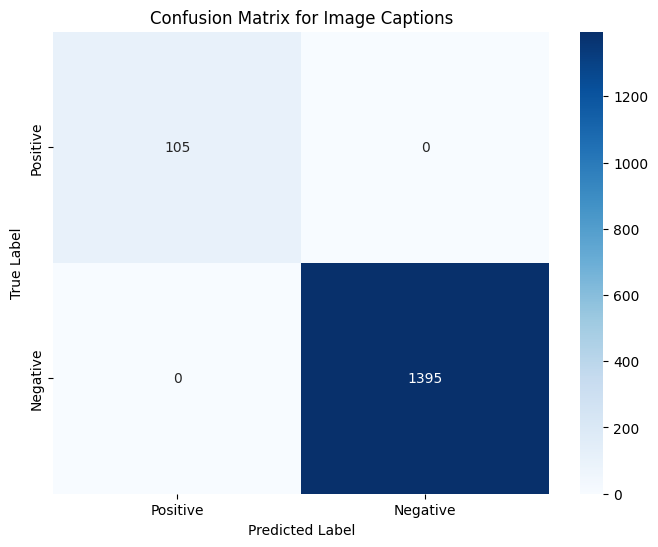

Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       105
    Negative       1.00      1.00      1.00      1395

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Preprocessing function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()  # Tokenize into words

# Function to calculate similarity between true and predicted text
def calculate_similarity(true_text, predicted_text):
    true_words = set(preprocess_text(true_text))
    predicted_words = set(preprocess_text(predicted_text))
    common_words = true_words.intersection(predicted_words)
    similarity = len(common_words) / len(true_words) if true_words else 0
    return similarity

# Define threshold for labeling
threshold = 0.7  # Exact match threshold (can adjust to 0.7, etc.)

# Initialize labels
generated_labels = []  # Predicted labels
actual_labels = []     # True labels

# Generate labels based on similarity
for true_text, predicted_text in zip(true_labels, predicted_labels):
    similarity = calculate_similarity(true_text, predicted_text)
    generated_labels.append("Positive" if similarity >= threshold else "Negative")
    actual_labels.append("Positive" if similarity >= threshold else "Negative")

# Create and visualize confusion matrix
cm = confusion_matrix(actual_labels, generated_labels, labels=["Positive", "Negative"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Image Captions")
plt.show()

# Print detailed classification metrics
print("Classification Report:")
print(classification_report(actual_labels, generated_labels, labels=["Positive", "Negative"]))


#Evaluating Different Models.
#BLEW Model
The BLEU score evaluates how well the generated captions match reference captions using precision.

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_similarity(true_text, predicted_text):
    """
    Calculate BLEU similarity with smoothing.
    """
    true_tokens = [true_text.split()]  # Reference needs to be a list of token lists
    predicted_tokens = predicted_text.split()
    smooth = SmoothingFunction()
    return sentence_bleu(true_tokens, predicted_tokens, smoothing_function=smooth.method1)
average_similarity = sum(calculate_similarity(true_label, predicted_label) for true_label, predicted_label in zip(true_labels, predicted_labels)) / len(true_labels)
print("average_bleu_similarity = ", average_similarity)



average_bleu_similarity =  0.059906528696295196


#BERT Score
Checks how similar the meaning of your captions is to the reference captions.


In [ ]:
!pip install bert_score  # Install the bert_score package

from bert_score import score

def calculate_similarity_bert(true_texts, predicted_texts):
    """
    Calculate and print the Precision, Recall, and F1 scores using BERTScore.

    Parameters:
        true_texts (list of str): List of reference captions (ground truth).
        predicted_texts (list of str): List of predicted captions.

    Returns:
        dict: A dictionary containing average Precision, Recall, and F1 scores.
    """
    if len(true_texts) != len(predicted_texts):
        raise ValueError("The number of true texts and predicted texts must be the same.")

    # Calculate BERTScore
    P, R, F1 = score(predicted_texts, true_texts, lang="en", verbose=True)

    # Compute the averages
    average_precision = P.mean().item()
    average_recall = R.mean().item()
    average_f1 = F1.mean().item()

    # Print individual scores
    print(f"Precision (P): {average_precision:.2f}")
    print(f"Recall (R): {average_recall:.2f}")
    print(f"F1 Score: {average_f1:.2f}")

    # Return scores as a dictionary
    return {
        "Precision": average_precision,
        "Recall": average_recall,
        "F1": average_f1
    }
average_similarity_bert = calculate_similarity_bert(true_labels, predicted_labels)
average_similarity_bert

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/46 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/24 [00:00<?, ?it/s]

done in 430.43 seconds, 3.48 sentences/sec
Precision (P): 0.90
Recall (R): 0.90
F1 Score: 0.90


{'Precision': 0.9009166955947876,
 'Recall': 0.8970069289207458,
 'F1': 0.898770809173584}

#CIDEr
Measures how much important information in your captions matches the reference captions.



In [ ]:
!pip install pycocoevalcap # install the pycocoevalcap package
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

# Preparing data for CIDEr evaluation
# Modified to the correct format
true_labels_dict = {idx: [{'caption': label}] for idx, label in enumerate(true_labels)}  # Ground truth captions
predicted_labels_dict = {idx: [{'caption': caption}] for idx, caption in enumerate(predicted_labels)}  # Predicted captions

# Tokenize captions
tokenizer = PTBTokenizer()
true_labels_tokenized = tokenizer.tokenize(true_labels_dict)
predicted_labels_tokenized = tokenizer.tokenize(predicted_labels_dict)

# Initialize CIDEr scorer
cider_scorer = Cider()

# Compute CIDEr score
scores, _ = cider_scorer.compute_score(true_labels_tokenized, predicted_labels_tokenized)
print("CIDEr Score:", scores)

CIDEr Score: 0.6267885014408994


#SPICE
Looks at how well your captions describe the details and relationships in the image.


In [ ]:
from pycocoevalcap.spice.spice import Spice
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

# Preparing the captions for SPICE evaluation
# Modified to the correct format
true_labels_dict = {idx: [{'caption': label}] for idx, label in enumerate(true_labels)}  # Each label is now a dictionary with a 'caption' key
predicted_labels_dict = {idx: [{'caption': caption}] for idx, caption in enumerate(predicted_labels)}  # Each caption is now a dictionary with a 'caption' key

# Tokenize captions
tokenizer = PTBTokenizer()
true_labels_tokenized = tokenizer.tokenize(true_labels_dict)
predicted_labels_tokenized = tokenizer.tokenize(predicted_labels_dict)

# Initialize SPICE scorer
spice_scorer = Spice()

# Compute SPICE score
scores, _ = spice_scorer.compute_score(true_labels_tokenized, predicted_labels_tokenized)
print(f"Average SPICE Score: {scores}")

Average SPICE Score: 0.2234152153218124
